In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.1'),
        ('cnn', 'b.2'),
        ('cnn', 'b.3'),
        ('cnn', 'b.4'),
        ('cnn', 'b.5'),
        ('cnn', 'b.6'),
        ('cnn', 'b.7'),
        ('cnn', 'b.8'),
        ('cnn', 'b.9'),
        ('cnn', 'b.10'),
        ('cnn', 'b.11'),
        ('cnn', 'b.12'),
        ('cnn', 'b.15'),
        ('cnn', 'b.18'),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name, modelname_alternative=lambda _1, x, _2, _3: int(x.split('.')[1]))


In [4]:
def compute_num_params(n_channel):
    return (9*9+1)*n_channel + (n_channel*4*4) +1

In [5]:
compute_num_params(8)

785

In [6]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [7]:
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')
HO_neuron_perf

subset                  OT       all
dataset    model                    
MkA_Shape  1      0.191103  0.284746
           2      0.209741  0.364272
           3      0.214933  0.385639
           4      0.219618  0.405035
           5      0.224216  0.407741
           6      0.223571  0.415334
           7      0.225216  0.417198
           8      0.225377  0.421815
           9      0.232761  0.424384
           10     0.225049  0.423358
           11     0.229323  0.428437
           12     0.231753  0.426111
           15     0.232534  0.433224
           18     0.238489  0.434912
MkE2_Shape 1      0.184317  0.287550
           2      0.212439  0.348592
           3      0.211901  0.364012
           4      0.221278  0.378593
           5      0.225384  0.383182
           6      0.233176  0.389428
           7      0.231652  0.389622
           8      0.232861  0.390816
           9      0.229838  0.396948
           10     0.233190  0.398298
           11     0.233730  0.399752
           12     0.236468  0.401814
           15     0.239626  0.403932
           18     0.239703  0.406568

In [8]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')
OT_neuron_perf

subset                  OT       all
dataset    model                    
MkA_Shape  1      0.387542  0.363718
           2      0.428533  0.438926
           3      0.444698  0.468527
           4      0.450794  0.475739
           5      0.453974  0.486011
           6      0.460763  0.495907
           7      0.466962  0.499528
           8      0.468364  0.500232
           9      0.473150  0.507491
           10     0.466594  0.508332
           11     0.471073  0.510387
           12     0.474667  0.514160
           15     0.478522  0.516127
           18     0.479045  0.522733
MkE2_Shape 1      0.404683  0.393029
           2      0.461793  0.465612
           3      0.475826  0.495158
           4      0.490762  0.507013
           5      0.495960  0.518340
           6      0.503926  0.526365
           7      0.507568  0.530676
           8      0.513093  0.534770
           9      0.514725  0.540943
           10     0.516914  0.542612
           11     0.520031  0.546527
           12     0.524222  0.550695
           15     0.529842  0.552378
           18     0.529470  0.559645

In [9]:
from tang_jcompneuro.plotting import image_subset_and_neuron_subset_list, show_perf_vs_size
from tang_jcompneuro import dir_dictionary
import os.path

In [10]:
# time to plot.
# magic numbers here follow
# https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_glm_opt_detailed.ipynb
def draw_one_stuff(dataset):
    # draw one by one.
    
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=True, sharey=True, squeeze=False,
                            figsize=(5.5,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
        
        if neuron_subset == 'OT':
            data_y = OT_neuron_perf.loc[(dataset, ), img_subset].values
            data_x = OT_neuron_perf.loc[(dataset, ), img_subset].index.values
        elif neuron_subset == 'HO':
            data_y = HO_neuron_perf.loc[(dataset, ), img_subset].values
            data_x = HO_neuron_perf.loc[(dataset, ), img_subset].index.values
        else:
            raise NotImplementedError
        assert data_y.shape == (14,)
        data_x = np.array([compute_num_params(x) for x in data_x])
        assert np.array_equal(data_x, np.sort(data_x))
        assert data_x.shape == data_y.shape == (data_x.size,)
        #print(data_x)
        # color
        # https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps
        show_perf_vs_size([data_x], [data_y], ['dummy'],
                          title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                      ax=ax, xlabel='# of parameters',
                      ylabel='mean $CC_\mathrm{norm}^2$' if idx == 0 else None,
                         style_list=[('-', '#1f77b4', 'x')], show_legend=False,
                         xlim=(0,2000),
                          ylim=(0.25, 0.6),
                         xticks=(0,500,1000,1500,
#                                  2000
                                ),
                         xticklabels=('0', '0.5k', '1k', '1.5k',
#                                       '2k'
                                     ),
                         yticks=(0.3, 0.4, 0.5, 0.6),
                         yticklabels=('0.3', '0.4', '0.5', '0.6'),
                          # for baseline model
                         vline=883)
    mk = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[dataset]
    fig.suptitle(f'model performance vs. # of parameters on monkey {mk}')
    # adjust figure 
    fig.subplots_adjust(top=0.7, bottom=0.2, left=0.11, right=1, hspace=0.1, wspace=0.05)
    
    save_dir = os.path.join(dir_dictionary['plots'], 'supp', 'performance_vs_model_size')
    os.makedirs(save_dir, exist_ok=True)
    fig.savefig(os.path.join(save_dir, f'perf_vs_size_{dataset}.pdf'), dpi=300)
    
    plt.show()

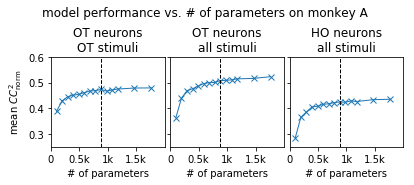

In [11]:
draw_one_stuff('MkA_Shape')

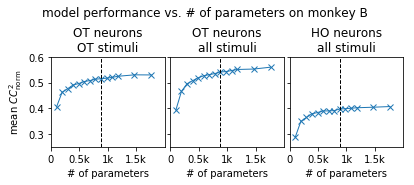

In [12]:
draw_one_stuff('MkE2_Shape')